## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load data into a dataframe

In [2]:
# read into dataframe
data = pd.read_csv('./output/roundlevel_combined7.csv', index_col=0)

## Compute normalized score for environmental production outcome

In [3]:
data['z_envProduction'] = data.groupby('country')['envProduction'].transform(lambda x: scale(x.astype(float)))

## Country-wise statistics for the environmental production outcome

In [4]:
data[['envProduction', 'country']].groupby('country').describe()

envProduction                                                        \
                 count          mean           std     min      25%      50%   
country                                                                        
KEN              901.0  20636.794673  14135.611103     0.0   7140.0  22968.0   
MAD             2402.0  34989.316403   8053.581822  2145.0  30480.0  36720.0   
cambodia        3744.0   5191.454060   3007.276690     0.0   3140.0   5225.0   
gabon           1565.0   1473.596805    402.439334    64.0   1242.0   1568.0   
orkney           514.0   5848.704280   2476.766832     0.0   4221.5   5861.5   
tanzania        1129.0   2974.325952    864.789512     0.0   2944.0   3264.0   
vietnam         4096.0   8925.385010   3286.316384     0.0   6931.0   9690.0   

                             
               75%      max  
country                      
KEN       30861.00  49617.0  
MAD       40793.00  50285.0  
cambodia   7170.00  12780.0  
gabon      1768.00   2232.0  
orkney     7480.25  12390.0  
tanzania   3520.00   3968.0  
vietnam   11664.00  13392.0

## Country-wise statistics for the normalized environmental production outcome

In [5]:
data[['z_envProduction', 'country']].groupby('country').describe()

z_envProduction                                              \
                   count          mean       std       min       25%   
country                                                                
KEN                901.0 -4.684870e-16  1.000555 -1.460726 -0.955338   
MAD               2402.0  5.463296e-17  1.000208 -4.079074 -0.560031   
cambodia          3744.0  2.092343e-16  1.000134 -1.726528 -0.682255   
gabon             1565.0 -5.125471e-18  1.000320 -3.503751 -0.575666   
orkney             514.0  6.307104e-17  1.000974 -2.363728 -0.657627   
tanzania          1129.0  8.034121e-17  1.000443 -3.440888 -0.035083   
vietnam           4096.0  1.038124e-17  1.000122 -2.716255 -0.606950   

                                        
               50%       75%       max  
country                                 
KEN       0.165009  0.723696  2.051294  
MAD       0.214941  0.720784  1.899635  
cambodia  0.011156  0.658007  2.523732  
gabon     0.234652  0.731781  1.885118  
orkney    0.005171  0.659382  2.643635  
tanzania  0.335113  0.631270  1.149545  
vietnam   0.232695  0.833441  1.359321

## Country-wise distributions

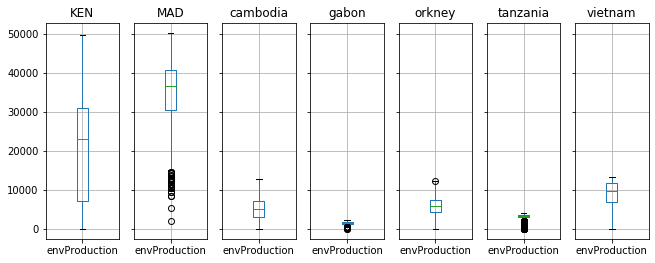

In [6]:
# plot boxplots
data[['envProduction', 'country']].groupby('country').boxplot(figsize=(12,4), layout=(1,8))
plt.show()

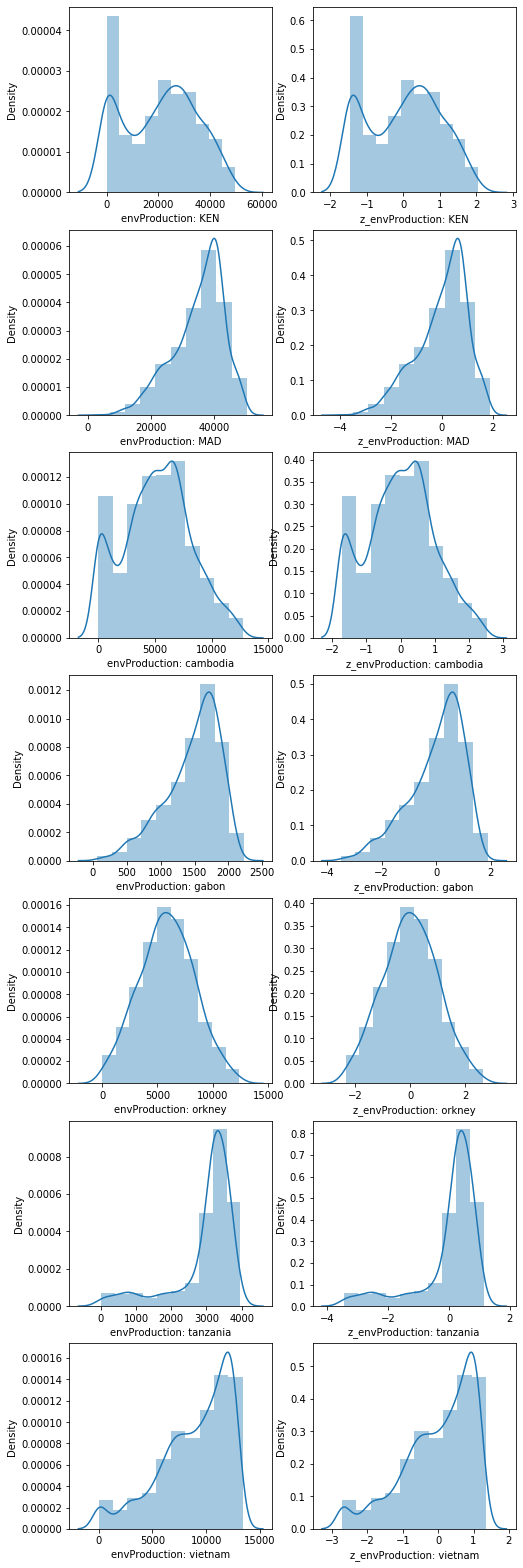

In [7]:
# plot histogram
fig, ax = plt.subplots(7, 2, figsize=(8,28))
i=0
for country, group in data.groupby('country'):
    sns.distplot(group['envProduction'], bins=10, ax= ax[i][0], axlabel="envProduction: {}".format(country))
    sns.distplot(group['z_envProduction'], bins=10, ax=ax[i][1], axlabel="z_envProduction: {}".format(country))
    i+=1

## Distributions in combined dataset

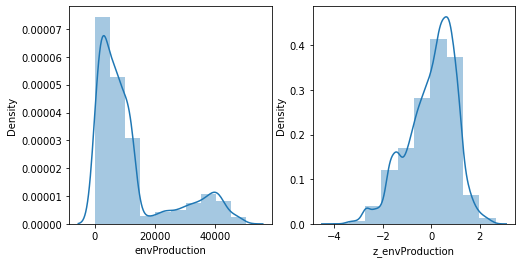

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))
sns.distplot(data['envProduction'], bins=10, ax= ax[0])
sns.distplot(data['z_envProduction'], bins=10, ax=ax[1])
print()

## QQ-plot for comparing the country-wise distributions

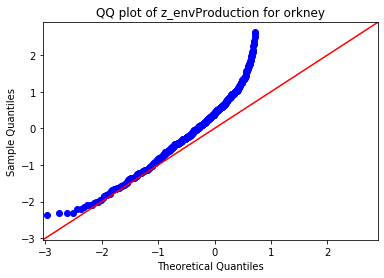

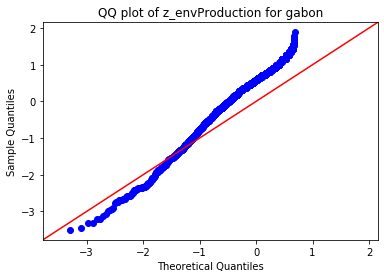

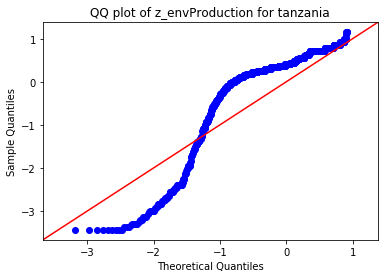

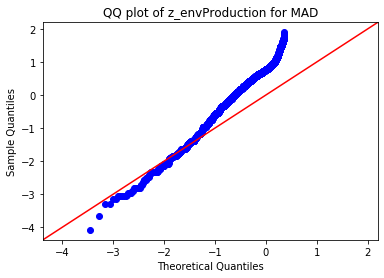

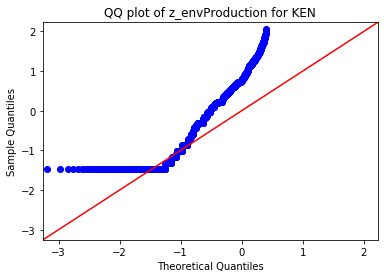

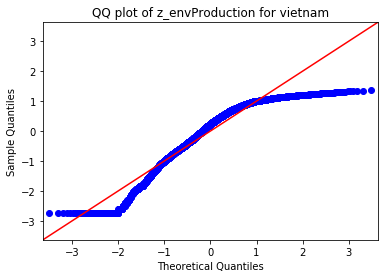

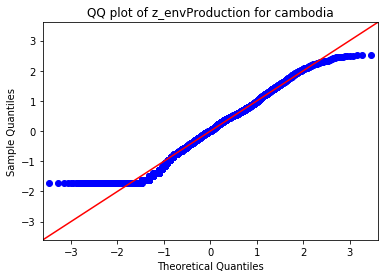

In [9]:
for val in data.country.unique():
    sm.qqplot(data[data['country']==val]['z_envProduction'], line ='45', label=val)
    plt.title('QQ plot of z_envProduction for {}'.format(val))
    plt.show()

## Visualize distributions on the same plot

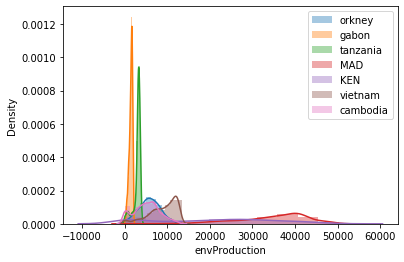

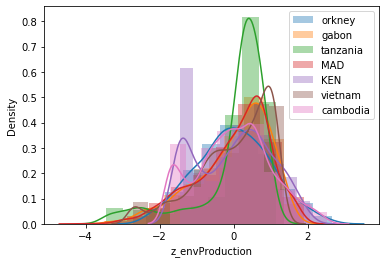

In [10]:
for val in data.country.unique():
    sns.distplot(data[data['country']==val]['envProduction'], bins=10, label=val)
    plt.legend()
plt.show()

for val in data.country.unique():
    sns.distplot(data[data['country']==val]['z_envProduction'], bins=10, label=val)
    plt.legend()
plt.show()

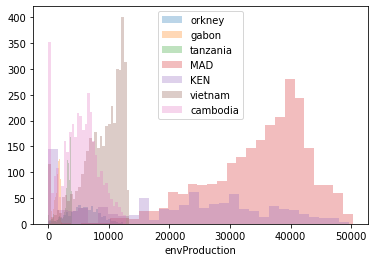

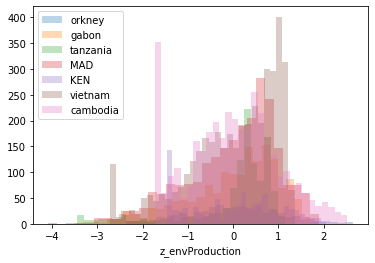

In [11]:
for val in data.country.unique():
    plt.hist(data[data['country']==val]['envProduction'], label=val, alpha=0.3, bins=30)
    plt.xlabel('envProduction')
    plt.legend()
plt.show()

for val in data.country.unique():
    plt.hist(data[data['country']==val]['z_envProduction'], label=val, alpha=0.3, bins=30)
    plt.xlabel('z_envProduction')
    plt.legend()
plt.show()